# Temporal Distribution of PMC in the Nordic Seas

In [1]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from common_defs import nyr, winters, month_weights, START_YEAR, aliases
import mypaths
from plot_utils import cc

from octant.core import TrackRun, OctantTrack
from octant.misc import SUBSETS, bin_count_tracks
import octant
octant.__version__

'0.0.10'

In [2]:
plt.style.use('paperfig.mplstyle')

In [3]:
dset_names = (
    ('era5_run000', 'ERA5, CTRL'),
    ('interim_run106', 'ERA-Interim, CTRL'),
    ('interim_run100', 'ERA-Interim, Low-$\zeta$')
)

In [4]:
track_runs = dict()
for (dset_name, _) in dset_names:
    TR = TrackRun()
    TR.data = OctantTrack.from_mux_df(pd.read_parquet(mypaths.procdir / f'{dset_name}_2008_2017.parquet', engine='pyarrow'))
    TR.is_categorised = True
    track_runs[dset_name] = TR

### Monthly distribution

In [5]:
weight_by_days_in_month = False

In [6]:
if weight_by_days_in_month:
    factor = month_weights
else:
    factor = np.ones(12) / nyr

In [7]:
subsets = SUBSETS[1:]
start_mon = 10
end_mon = 4

In [8]:
all_monthly_counts = dict()
for k, TR in tqdm(track_runs.items(), desc='track runs', leave=False):
    monthly_counts = pd.DataFrame({subset: factor * bin_count_tracks(TR[subset],
                                                                     start_year=START_YEAR,
                                                                     n_winters=nyr)
                                   for subset in subsets})
    monthly_counts['month_names'] = calendar.month_name[1:]
    monthly_counts = pd.concat([monthly_counts[start_mon-1:], monthly_counts[:end_mon]])
    all_monthly_counts[k] = monthly_counts

In [9]:
mon_range = np.arange(monthly_counts.shape[0])

In [10]:
width = 1/5

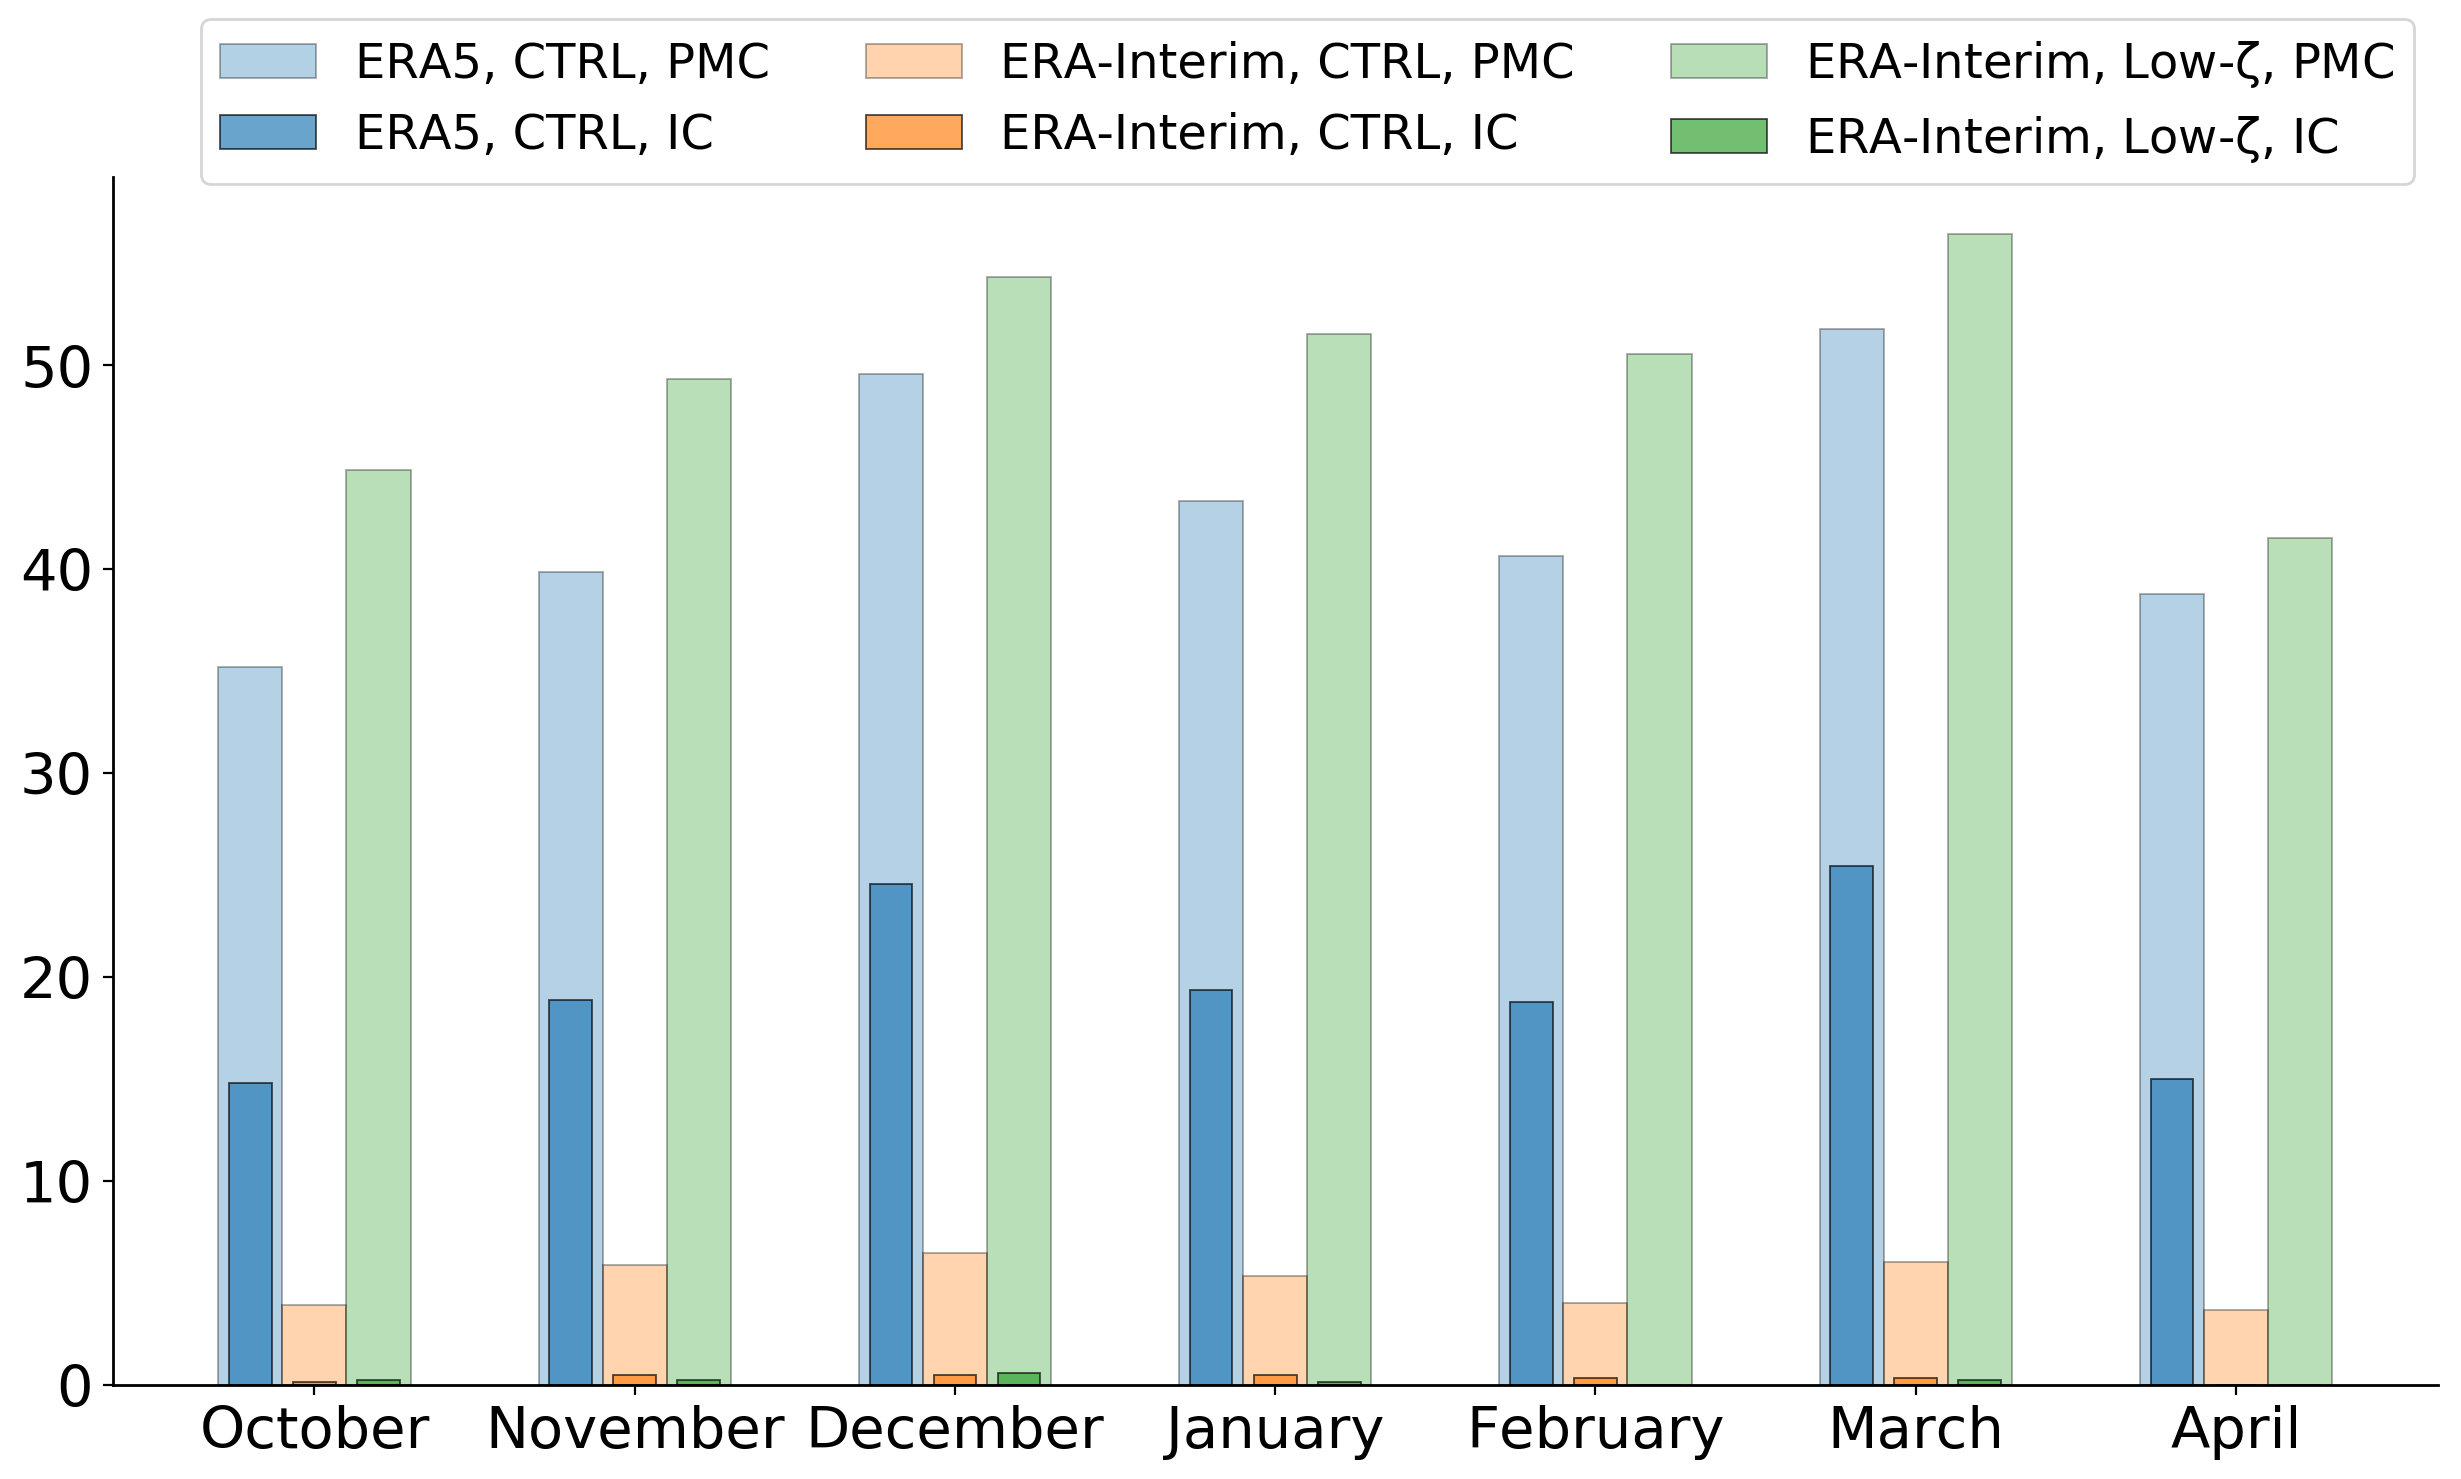

In [11]:
fig, ax = plt.subplots()

for j, ((dset_name, dset_label), color) in enumerate(zip(dset_names, cc)):
    for i, (subset) in enumerate(subsets):
        factor = 1 - i * 1/3
        ax.bar(mon_range + (j-1)*width, all_monthly_counts[dset_name][subset],
               width=width*factor,
               **color,
               alpha=4/3-factor,
               edgecolor='#000000',
               linewidth=2/3,
               label=f'{dset_label}, {aliases[subset]}')

ax.legend(loc=1, ncol=len(dset_names), fontsize='x-large', bbox_to_anchor=(1, 1.15))
# ax.set_ylim(0, 150)

ax.set_xticks(mon_range)
ax.set_xticklabels(monthly_counts.month_names, rotation=0)
ax.tick_params(labelsize='xx-large')

for spine in ax.spines.values():
    if spine.spine_type in ['top', 'right']:
        spine.set_linewidth(0)
    else:
        spine.set_linewidth(1)

In [12]:
fig.savefig(mypaths.plotdir / f'pmctrack_monthly_counts_era5_vs_interim')

### Yearly distribution

In [13]:
all_winter_counts = dict()
for k, TR in tqdm(track_runs.items(), desc='track runs', leave=False):
    winter_counts = pd.DataFrame({subset: bin_count_tracks(TR[subset],
                                                           by='W',
                                                           start_year=START_YEAR,
                                                           n_winters=nyr)
                                  for subset in subsets})
    winter_counts['winters'] = winters
    all_winter_counts[k] = winter_counts

In [14]:
# winter_counts = pd.DataFrame({subset: bin_tracks(TR[subset], by='W') for subset in subsets})
# winter_counts['winters'] = winters

In [15]:
winter_counts

,moderate,strong,winters
0,301,1,2008_2009
1,294,0,2009_2010
2,326,5,2010_2011
3,364,1,2011_2012
4,340,1,2012_2013
5,350,1,2013_2014
6,374,1,2014_2015
7,319,1,2015_2016
8,370,0,2016_2017


In [16]:
# fig, ax = plt.subplots()
# winter_counts.plot.bar(ax=ax)
# ax.set_xticklabels([i.replace('_', '-') for i in  winter_counts.winters], rotation=45)
# ax.tick_params(labelsize='xx-large')
# plt.setp(ax.get_legend().get_texts(), fontsize='x-large');
# fig.savefig(mypaths.plotdir / 'climatology' / f'pmctrack_yearly_counts_{dataset}.{fmt}', **svfigkw)

In [17]:
win_range = np.arange(nyr)

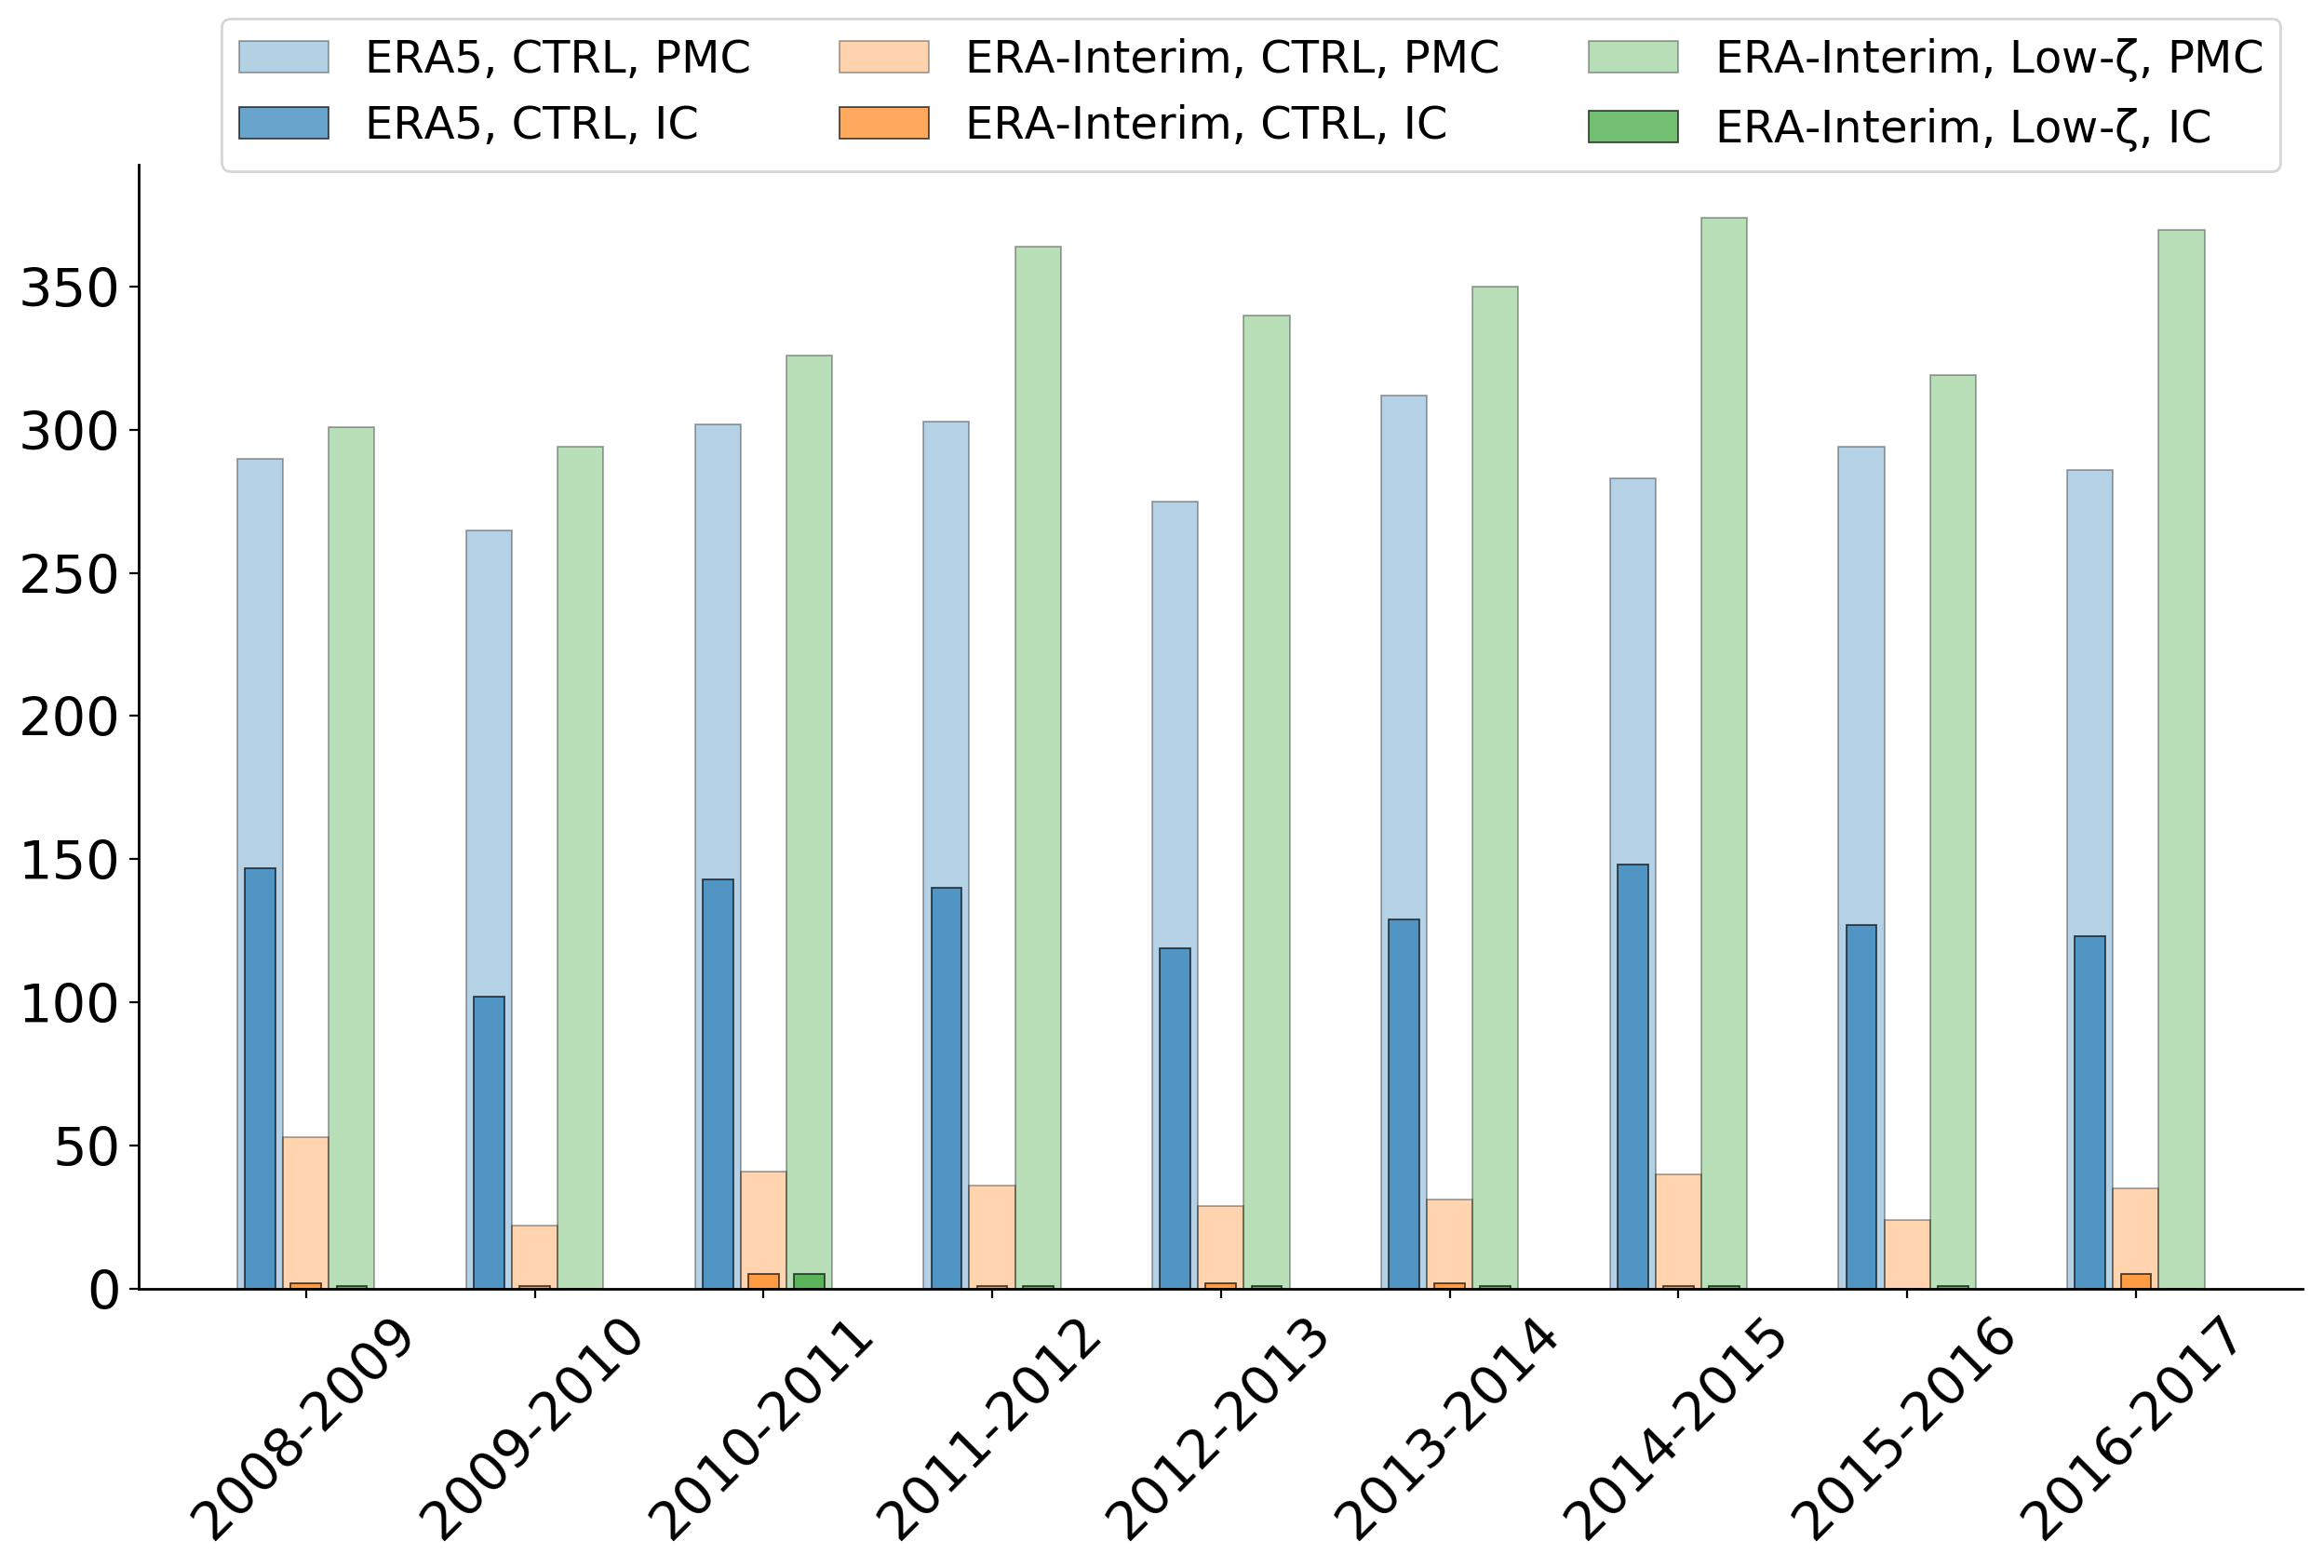

In [18]:
fig, ax = plt.subplots()

for j, ((dset_name, dset_label), color) in enumerate(zip(dset_names, cc)):
    for i, (subset) in enumerate(subsets):
        factor = 1 - i * 1/3
        ax.bar(win_range + (j-1)*width, all_winter_counts[dset_name][subset],
               width=width*factor,
               **color,
               alpha=4/3-factor,
               edgecolor='#000000',
               linewidth=2/3,
               label=f'{dset_label}, {aliases[subset]}')

ax.legend(loc=1, ncol=len(dset_names), fontsize='x-large', bbox_to_anchor=(1, 1.15))
# ax.set_ylim(0, 150)

ax.set_xticks(win_range)
ax.set_xticklabels([i.replace('_', '-') for i in  winter_counts.winters], rotation=45)
ax.tick_params(labelsize='xx-large')

for spine in ax.spines.values():
    if spine.spine_type in ['top', 'right']:
        spine.set_linewidth(0)
    else:
        spine.set_linewidth(1)

In [19]:
fig.savefig(mypaths.plotdir / f'pmctrack_yearly_counts_era5_vs_interim')

In [20]:
for k, TR in track_runs.items():
    for i in ['all'] + SUBSETS:
        print(k, TR.size(i) / nyr)

era5_run000 4437.333333333333
era5_run000 754.2222222222222
era5_run000 290.0
era5_run000 130.88888888888889
interim_run106 400.22222222222223
interim_run106 138.44444444444446
interim_run106 34.55555555555556
interim_run106 2.111111111111111
interim_run100 6232.111111111111
interim_run100 936.0
interim_run100 337.8888888888889
interim_run100 1.2222222222222223
